### 분석 타겟 컬럼

- Life_expectancy: 기대수명

### 1번 (유아, 청소년 관련 변수)

- Infant_deaths: 영아 사망 수
- Under_five_deaths: 5세 이하 사망 수
- Polio: 소아마비 예방접종률
- Thinness_five_nine_years: 5-9세의 저체중 비율
- Thinness_ten_nineteen_years: 10-19세의 저체중 비율

---
colorcode :'viridis'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


- list01 : 분석 타겟을 포함한 1번 카테고리의 컬럼 리스트
- df_1st : 새로 분류한 데이터
- val_1st : 분석 타겟을 제외한 컬럼 리스트

In [3]:
# 1번 카테고리 따로 분류

list01 = ['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Polio', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']
val_1st = ['Infant_deaths', 'Under_five_deaths', 'Polio', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']

df_1st = df[list01]

In [4]:
df_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Life_expectancy              179 non-null    float64
 1   Infant_deaths                179 non-null    float64
 2   Under_five_deaths            179 non-null    float64
 3   Polio                        179 non-null    float64
 4   Thinness_five_nine_years     179 non-null    float64
 5   Thinness_ten_nineteen_years  179 non-null    float64
dtypes: float64(6)
memory usage: 8.5 KB


#### 각 요소간의 상관관계 평가

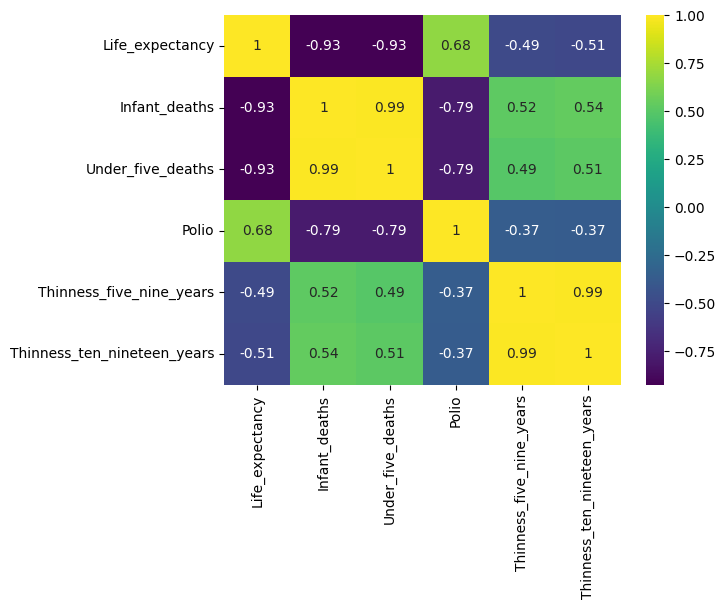

In [5]:
corr_matrix = df_1st.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

- 0에 가까울수록 상관관계가 없고, 1은 양의 상관관계, -1은 음의 상관관계를 보여줌.
#### Life_expectancy(기대수명)과 다른 요소들의 관계:
- Infant_deaths와 Under_five_deaths: 상관계수 -0.93
    - 매우 강한 음의 상관관계.
    - 유아 사망률이나 5세 미만 사망률이 높을수록 기대수명이 낮아진다는 것을 보여줌.
- Polio: 상관계수 0.68
    - 중간 정도의 양의 상관관계.
    - 소아마비 백신 접종률이 높을수록 기대수명이 증가하는 경향.
- Thinness_five_nine_years 및 Thinness_ten_nineteen_years: 상관계수 각각 -0.49, -0.51
    - 약한 음의 상관관계.
    - 저체중율이 높아질수록 기대수명이 감소하는 경향이 있지만, 앞의 변수들에 비해 영향력이 적음.
#### Infant_deaths와 Under_five_deaths:
- 상관계수 0.99
- 거의 완벽한 양의 상관관계.
- 이는 유아 사망률과 5세 미만 사망률이 서로 밀접하게 연결되어 있다는 것을 의미함.
- 실제로 유아 사망은 5세 미만 사망의 주요 구성 요소일 가능성이 큼.
#### Thinness_five_nine_years와 Thinness_ten_nineteen_years:
- 상관계수 0.99
- 거의 완벽한 양의 상관관계.
- 5~9세의 저체중은 10~19세의 저체중까지 밀접한 관계가 있음을 보여줌
#### Polio와 다른 변수들:
- Infant_deaths 및 Under_five_deaths와는 각각 -0.79로 음의 상관관계.
- 소아마비 백신 접종률이 낮은 지역에서 유아 및 5세 미만 사망률이 높다는 것을 시사함.
- Thinness 변수들과는 약한 음의 상관관계(-0.37).
- 백신 접종률이 저체중율과도 연관이 있을 수 있지만, 관계는 약함.

####

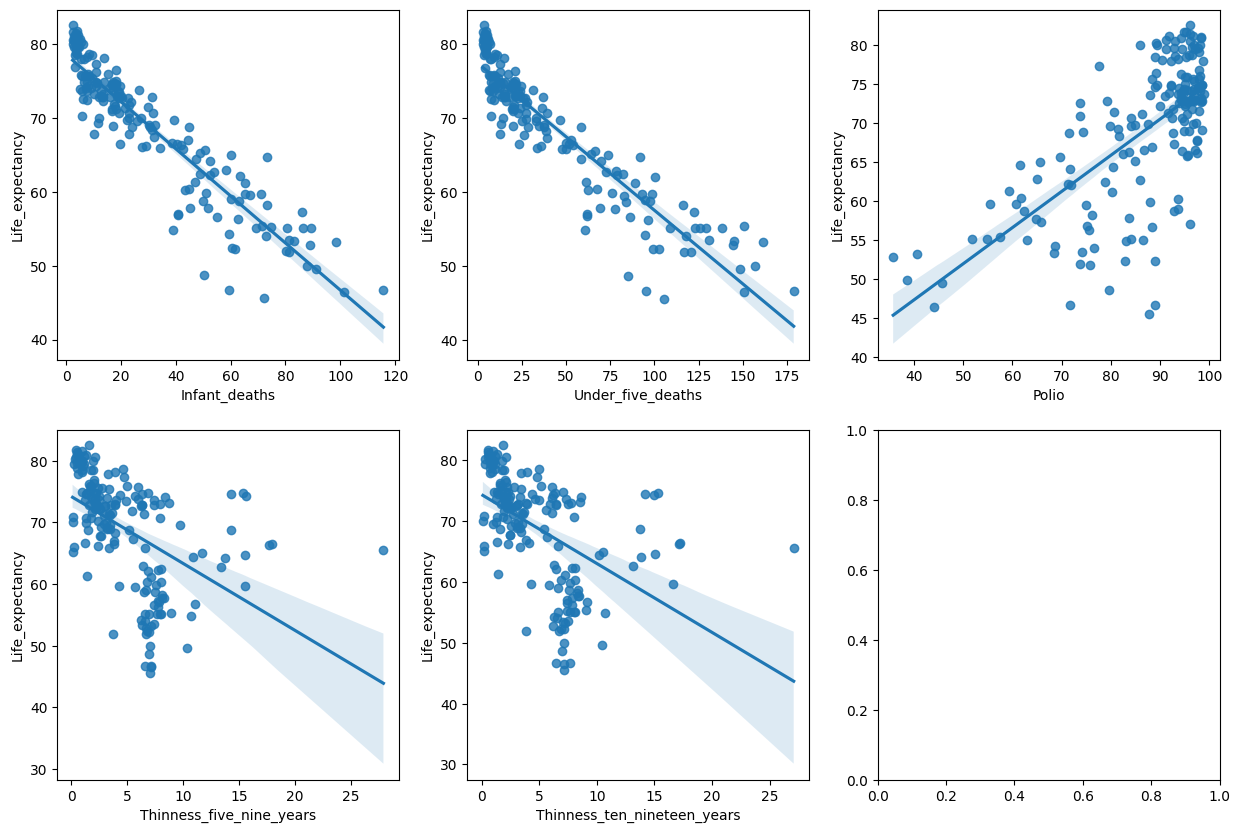

In [6]:
fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

columns = val_1st


for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]

    sns.regplot(data=df, x = col_name, y = 'Life_expectancy', ax = ax_temp)

- 실제로 산점도를 그려보았을때 영유아기 사망률과 소아마비 백신 접종률은 기대수명과 밀접한 연관이 있지만 저체중 요소는 큰 연관성을 보여주지 못함

In [7]:
# 비슷한 변수 합치기
df['Child_deaths'] = df['Infant_deaths'] + df['Under_five_deaths']
df = df.drop(['Infant_deaths', 'Under_five_deaths'], axis=1)
df['Thinness_youth'] = df['Thinness_five_nine_years'] + df['Thinness_ten_nineteen_years']
df = df.drop(['Thinness_five_nine_years', 'Thinness_ten_nineteen_years'], axis=1)
df

,Country,Region,Year,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Schooling,Economy_status,Life_expectancy,Child_deaths,Thinness_youth
0,Afghanistan,Asia,2007.5,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,2.90000,1.0,59.65625,169.69375,32.16250
1,Albania,Rest of Europe,2007.5,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,9.24375,1.0,75.95000,32.40000,3.31875
2,Algeria,Africa,2007.5,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.99375,1.0,73.78750,57.95000,12.06875
3,Angola,Africa,2007.5,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,4.60625,1.0,52.82500,232.93125,12.86250
4,Antigua and Barbuda,Central America and Caribbean,2007.5,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,9.01875,1.0,75.35000,20.99375,6.80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,8.23750,1.0,72.79375,34.35000,3.21250
175,Vietnam,Asia,2007.5,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,6.90000,1.0,74.33125,43.97500,30.55000
176,"Yemen, Rep.",Middle East,2007.5,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,2.22500,1.0,64.16250,122.01875,27.58125
177,Zambia,Africa,2007.5,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.43750,1.0,52.33125,159.78750,13.64375


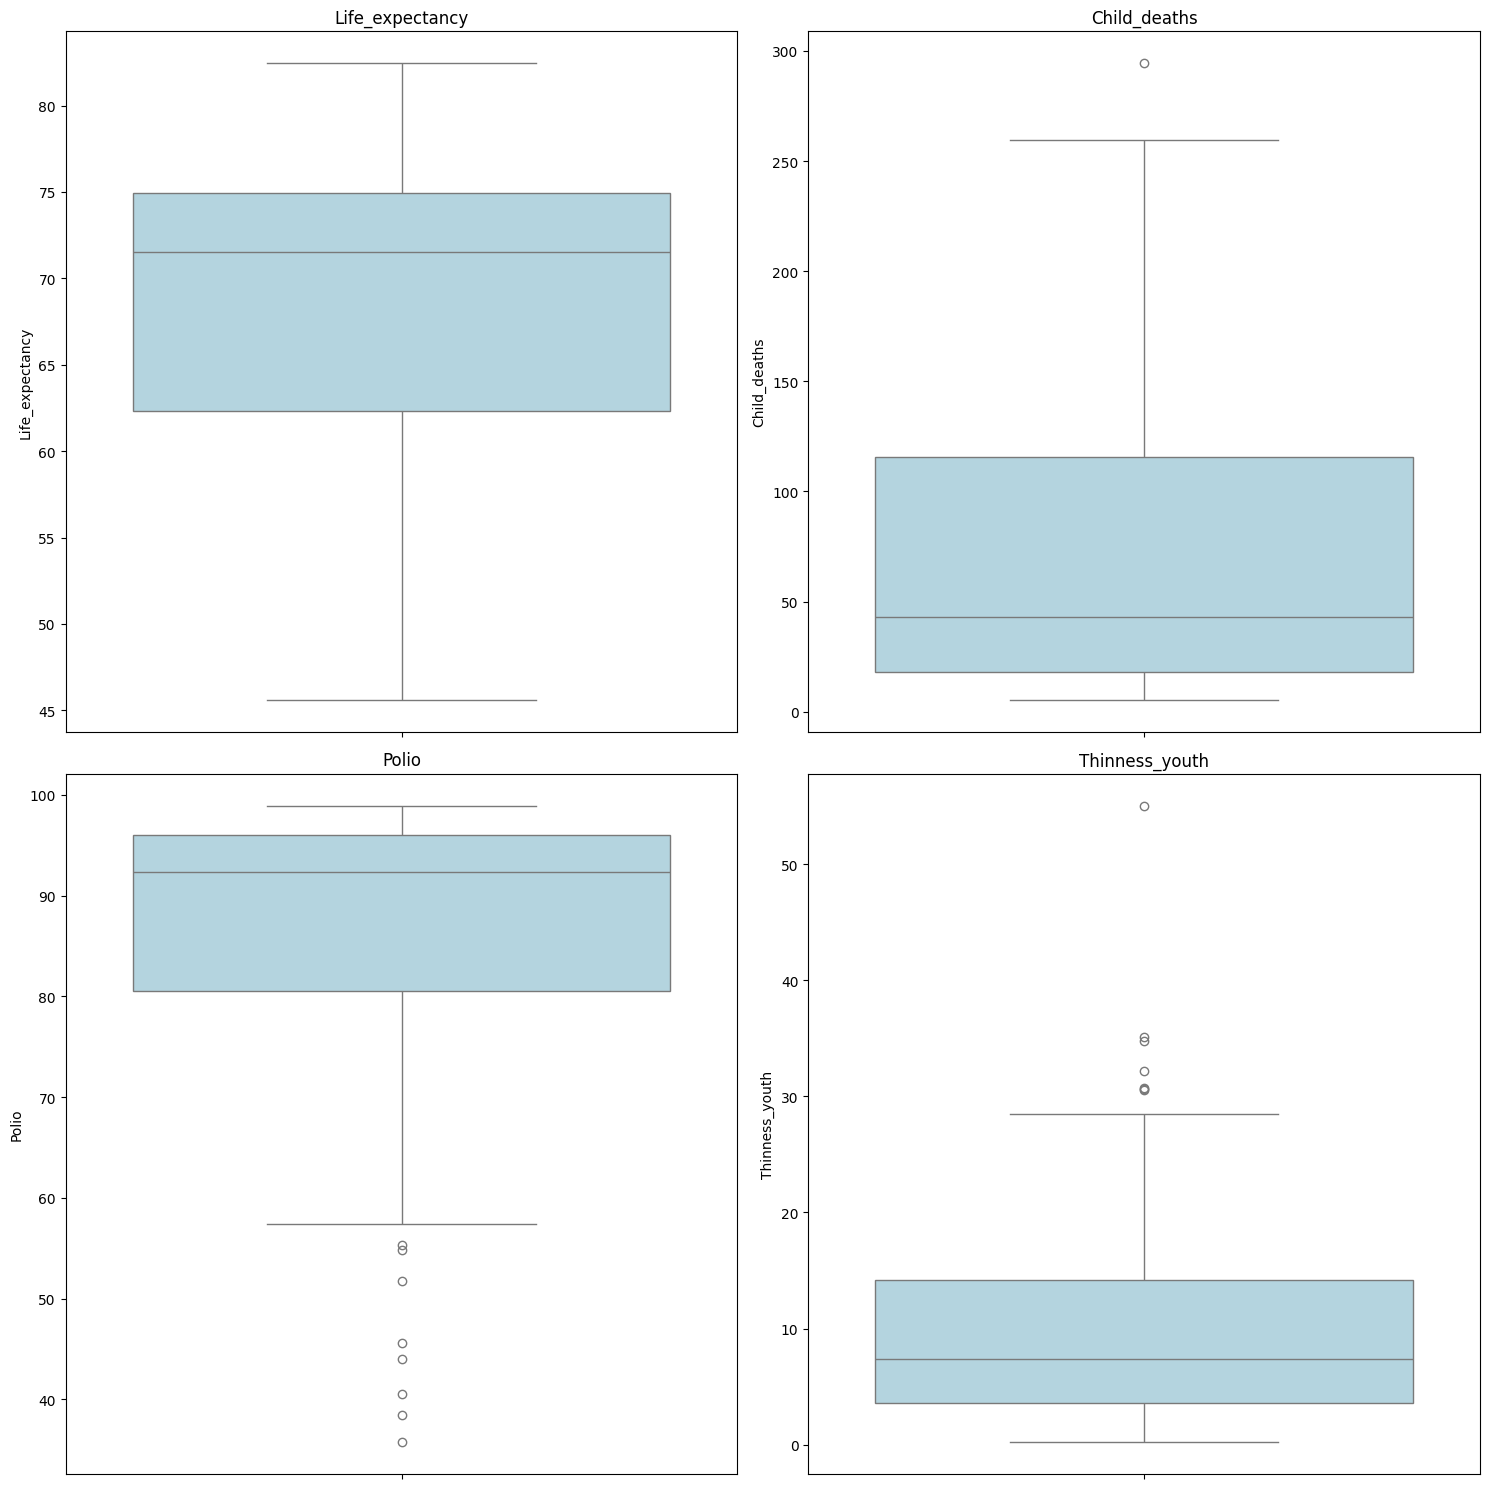

In [8]:
# 박스플롯 그리기
columns = ['Life_expectancy','Child_deaths', 'Polio', 'Thinness_youth']

plt.figure(figsize=(15, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

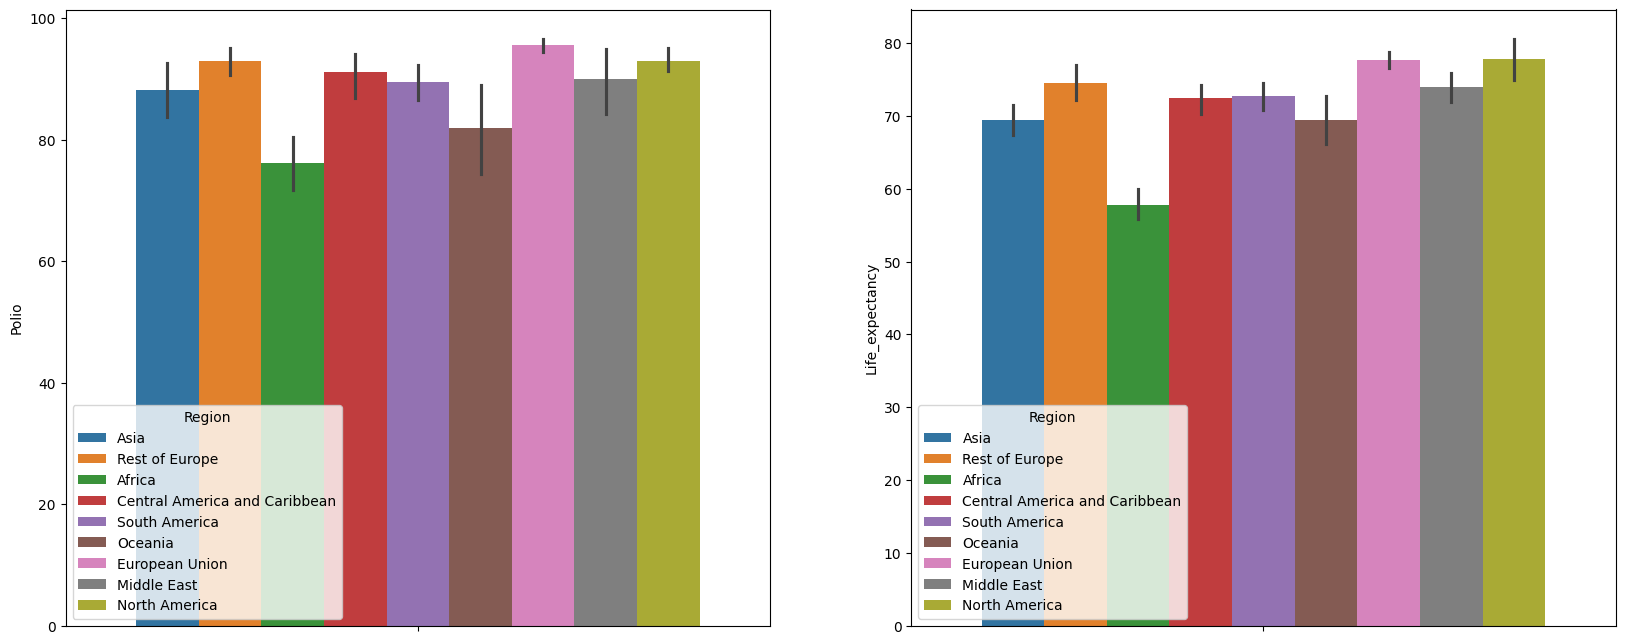

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.barplot(data=df, y='Polio', hue='Region')

plt.subplot(1,2,2)
sns.barplot(data=df, y='Life_expectancy', hue='Region')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 준비
# 예: df는 데이터프레임, y는 종속 변수, X는 독립 변수들
X = df[['Child_deaths', 'Polio', 'Thinness_youth']]
y = df['Life_expectancy']

# 2. 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. 회귀 모델 생성 및 학습
lr = LinearRegression()  # 선형 회귀 모델 생성
lr.fit(X_train, y_train)  # 학습 진행

# 4. 모델 평가
# 테스트 데이터에 대한 예측
y_pred = lr.predict(X_test)

# 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
r2 = r2_score(y_test, y_pred)  # R-squared (설명력)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 5. 회귀 계수 출력
print("회귀 계수 (Coefficients):", lr.coef_)
print("절편 (Intercept):", lr.intercept_)



Mean Squared Error: 10.81
R-squared: 0.89
회귀 계수 (Coefficients): [-0.13619224 -0.08852204 -0.03187143]
절편 (Intercept): 86.74711356790947
